## What We Looked At Last Time
* We most recently looked at the use of **NumPy arrays**, which provide for efficient computation associated with _large_ collections of information.
* In addition, we looked at some ways to gather **date and time data**, which permitted us to _measure execution time_.

## What We'll Look At Today
* We'll introduce the **Pandas** library, which which provides the cornerstone for many practical _data operations_ in Python
* We'll look at the process of reading and writing to data files, both with and without the Pandas library.

# Intro to Data Analysis: `pandas` Series and `DataFrames`
* NumPy’s `array` is optimized for homogeneous numeric data that’s accessed via integer indices
* Big data applications must support **mixed data types**, along with the ability the _clean the data_
* In this context, _cleaning the data_ implies removing erroneous data, accounting for missing data, and fixing inconsistencies within data.
* **Pandas** is the most popular library for dealing with this task.
* Two key collection types exist in Pandas:
    * **`Series`** for one-dimensional collections 
    * **`DataFrames`** for two-dimensional collections
* We'll focus primarily on the latter, because it's the most useful in practice.

## pandas `Series` 
* An enhanced one-dimensional `array`
* Supports custom indexing, including even non-integer indices like strings
* Offers additional capabilities that make them more convenient for many data-science oriented tasks
    * `Series` may have missing data
    * Many `Series` operations ignore missing data by default

### Starting Small: a basic pandas  `Series`
* The `pd.Series` constructor can be used to create a series from any iterable
* Different underlying iterables can result in different datatypes for the series.
* By default, a series has integer indices numbered sequentially from 0
* Many basic operations available to lists or numPy arrays can be applied to series.

In [4]:
import pandas as pd
gradesList = [86, 91, 94, 89]
gradesSeries1 = pd.Series(gradesList)
print(gradesSeries1)
gradesList = ['red', 'blue', 'green', 'purple','orange']
gradesSeries1 = pd.Series(gradesList)
print(gradesSeries1)

0    86
1    91
2    94
3    89
dtype: int64
0       red
1      blue
2     green
3    purple
4    orange
dtype: object


## `DataFrames` 
* Data Series have limited utility in practice.
* DataFrames provide enhanced two-dimensional `arrays`
* Can have custom row and column indices
* Offers additional operations and capabilities that make them fundamental for many data-science oriented tasks
* Support missing data (important for real world considerations!)
* Each column in a `DataFrame` is technically an individual `Series`

### Creating a `DataFrame` from a Dictionary
* One of the simplest ways to create a dataframe is to use the `DataFrame` constructor with dictionary that has list _values_
* The keys of the dictionary determine the nature of the dataframe _columns_.
* Indices are automatically assigned in sequential numerical order.
* While homogenous lists are permitted, lists of mixed types may be used to obtain a dataframe with _heterogenous_ data.

In [6]:
import pandas as pd
grades_dict = {'Wally': [87, 96, 70], 'Eva': [100, 87, 90],
               'Tim': [94, 77, 90], 'Katie': [100, 81, 82],
               'Bob': [83, 65, 85]}
grades = pd.DataFrame(grades_dict) #dataframe with homogenous data
print(grades)

   Wally  Eva  Tim  Katie  Bob
0     87  100   94    100   83
1     96   87   77     81   65
2     70   90   90     82   85


In [8]:
students_dict = {'LName':['James','Caldin', 'Smith'], 'StudentID': [111111, 123456, 246802], 'GPA': [3.8, 3.6, 3.5]}
students = pd.DataFrame(students_dict) #dataframe with heterogenous data
print(students) 

    LName  StudentID  GPA
0   James     111111  3.8
1  Caldin     123456  3.6
2   Smith     246802  3.5


### Customizing a `DataFrame`’s Indices with the `index` Attribute 
* Can use the **`index` attribute** to change the `DataFrame`’s indices from sequential integers to labels
* Must provide a one-dimensional collection that has the same number of elements as there are _rows_ in the `DataFrame`

In [8]:
grades.index = ['Test1', 'Test2', 'Test3']
print(grades)

       Wally  Eva  Tim  Katie  Bob
Test1     87  100   94    100   83
Test2     96   87   77     81   65
Test3     70   90   90     82   85


### Accessing a `DataFrame`’s Columns 
* Can quickly and conveniently look at your data in many different ways, including selecting portions of the data
* We can retrieve a single column using the appropriate index, which returns a view of it as a data _series_. 
* If a `DataFrame`’s column-name strings are valid Python identifiers, you can access them as attributes.

In [9]:
print(grades['Eva']) #retrieve all of Eva's grades

Test1    100
Test2     87
Test3     90
Name: Eva, dtype: int64


In [17]:
print(students['StudentID']) 
print(students.StudentID) #identical to the statement above

0    111111
1    123456
2    246802
Name: StudentID, dtype: int64
0    111111
1    123456
2    246802
Name: StudentID, dtype: int64


### Selecting Rows via the `loc` and `iloc` Attributes
* `DataFrame`s support indexing capabilities with `[]`, but pandas documentation recommends using the attributes `loc`, `iloc`, `at` and `iat`
    * Optimized to access `DataFrame`s and also prevents ambiguity (e.g. when we see `loc` it is immediately clear a dataframe is involved.
    * We can access a row by its _label_ via the `DataFrame`’s **`loc` attribute**
    * Alternatively, we can access a row by its _index_ via the **iloc attribute** 

In [20]:
print(grades.loc['Test1']) #Access the first test (index 0)


KeyError: 'Test1'

In [22]:
print(grades.iloc[1]) #Access the second test (index 1)

Wally    96
Eva      87
Tim      77
Katie    81
Bob      65
Name: 1, dtype: int64


### Selecting Rows via Slices with the `loc` and `iloc` Attributes
* Indices can use _slice_ notation
    * When using slices containing _labels_ with `loc`, the range specified **includes** the second label
    * When using slices containing _indices_ with `iloc`, the range specified **excludes** the second index 

In [24]:
print(grades)
print()
print(grades.loc['Test1':'Test2'])


   Wally  Eva  Tim  Katie  Bob
0     87  100   94    100   83
1     96   87   77     81   65
2     70   90   90     82   85

Empty DataFrame
Columns: [Wally, Eva, Tim, Katie, Bob]
Index: []


In [26]:
print(grades.iloc[0:5])

   Wally  Eva  Tim  Katie  Bob
0     87  100   94    100   83
1     96   87   77     81   65
2     70   90   90     82   85


### Selecting Rows via Lists with the `loc` and `iloc` Attributes
* List notation can be used as with arrays or series (remember the brackets!)
    * As with arrays and series, accessing with slices generates a _shallow_ copy
    * Using list notation generates a _deep_ copy

In [32]:
print(grades.loc[['Test1', 'Test3']])

KeyError: "None of [Index(['Test1', 'Test3'], dtype='object')] are in the [index]"

In [30]:
print(grades.iloc[[0, 2]])

   Wally  Eva  Tim  Katie  Bob
0     87  100   94    100   83
2     70   90   90     82   85


### Selecting Subsets of the Rows and Columns 
* Add a _second_ argument to either `loc` or `iloc` to access specific columns
* `loc` requires column names, while `iloc` requires their numerical index.
* General notation rules follow those for arrays.

In [34]:
print(grades)

   Wally  Eva  Tim  Katie  Bob
0     87  100   94    100   83
1     96   87   77     81   65
2     70   90   90     82   85


In [36]:
print(grades.loc['Test1':'Test2', ['Eva', 'Bob']]) #Return the first two test scores for Eva and Bob

Empty DataFrame
Columns: [Eva, Bob]
Index: []


In [38]:
print(grades.iloc[:, 0:3]) #Return all test scores for the first three columns (individuals)

   Wally  Eva  Tim
0     87  100   94
1     96   87   77
2     70   90   90


In [40]:
grades.iloc[:, 0:3].mean(axis=0)

Wally    84.333333
Eva      92.333333
Tim      87.000000
dtype: float64

### Pandas and Statistics
* A common need with data is to compute various statistics that describe it.
* DataFrames accommodate many of these in practice using standard method notation, including `mean`, `min`, `max`, and `median` among others.
* The syntax for such statistics is \<DataFrame\>.\<method_name\>(axis=\<0 or 1\>) 
    * Here "axis" should be 0 if the statistics are computed per row and 1 if they are computed per column
* Ex: mystats.mean(axis = 0) will compute the average of every row in a DataFrame named "mystats". 

In [42]:
#We can compute the average grade per person
grades.mean(axis=0)

Wally    84.333333
Eva      92.333333
Tim      87.000000
Katie    87.666667
Bob      77.666667
dtype: float64

In [44]:
#Or we can compute the highest grade per exam
grades.max(axis=1)

0    100
1     96
2     90
dtype: int64

In [46]:
#Or we can compute the median grade per person excluding the last exam (Test 3)
grades.loc['Test1':'Test2'].median(axis=0)

Wally   NaN
Eva     NaN
Tim     NaN
Katie   NaN
Bob     NaN
dtype: float64

## `csv` Files and Python
* **Comma-separated value** or **.csv** files are simple data files that use commas as delimiters between elements.
* .csv files are generally described having the most "universal" of data formats.
    * A principal advantage to .csv files is that virtually any data-reliant application can open and/or convert them to varying formats.
    * A principal drawback of .csv files is that they are extremely insecure due to both their ubiquitous nature and transparency.
* The **`csv` module** provides suitable functionality for working with .csv files

## DataFrames and Files
* While we can use dictionaries or similar collections to produce DataFrames, in practice we often rely on **data files** to produce a DataFrame for analysis.
* We therefore address the useful application of reading/writing data files in Python below.
* After doing so, we look at the critical use of Pandas to perform analysis with files.

### Writing to a CSV File using `with`
* As with other text-based files, a `with open` clause can be used to open a .csv file for reading or writing.
    * Use `mode='w'` to open a file for writing purposes.
    * `csv` module documentation recommends opening CSV files with the additional keyword argument `newline=''` to ensure that newlines are processed properly in writing CSV files
* `csv.writer` is a function that returns a wrapper object around an open text object that allows fast and simple processing of files that used commas as delimiters.  
    * A `writer`’s **`writerow` method** receives an iterable of tokens to store in the file
    * By default, `writerow` delimits separate tokens with commas, but you can specify custom delimit

In [42]:
import csv
with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow(['Acct Num', 'Name', 'Balance'])
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.67])
    writer.writerow([300, 'Stone', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])

### `writerow` and `writerows` details
* `writerow` calls such as the above can be replaced with one **`writerows`** call that outputs a _comma-separated list_ of iterables representing the records
* If you write data that contains commas in a given string, `writerow` encloses that string in double quotes to indicate a _single_ value

In [45]:
rowlist = [['Acct Num', 'Name', 'Balance'], [100, 'Jones, Elaine', 24.98], [200, 'Doe, John', 345.67],
           [300, 'Stone, Cassie', 0.00], [400, 'Stone, Adam', -42.16], [500, 'Rich, Evelyn', 224.62]]
with open('accountsv2.csv', mode='w', newline='') as accountsv2:
    writer = csv.writer(accountsv2)
    writer.writerows(rowlist)

### Reading from a CSV File
* Reading records from a .csv file follows similar principles (albeit in "reverse"), with changes as follows:
    * `mode='r'` should be used in lieu of the writing mode.
    * The `csv.reader` function should be used to create a wrapper object for reading csv lines.
    * The reader ultimately provides a _lazy iterable_ containing tuples of tokens. 

In [48]:
with open('accounts.csv', mode='r', newline='') as accounts:
    reader = csv.reader(accounts)
    for record in reader:  
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

Acct Num  Name         Balance
100       Jones          24.98
200       Doe           345.67
300       Stone            0.0
400       Stone         -42.16
500       Rich          224.62


### Datasets
* In practice, we almost always use datasets that are provided to us or we find online, as opposed to one we generate.
* There are an enormous variety of free datasets available online, including many in .csv format.
* **Rdatasets repository** provides links to over 1100 free datasets in comma-separated values (CSV) format
> https://vincentarelbundock.github.io/Rdatasets/datasets.html
* Another large source of datasets is
> https://github.com/awesomedata/awesome-public-datasets
* Lastly, Kaggle is a website specifically known to possess datasets related to a variety of data sources and tasks.
> https://kaggle.com 


## Reading CSV Files into Pandas `DataFrames` 
* The process of loading .csv files into Python and converting them into a dataframe is common enough a pandas function was created for that specific purpose:
    * `pd.read_csv` will load a .csv dataset into a `DataFrame` specified as a return argument.
    * The `names` argument specifies the `DataFrame`’s column names
    * Note: without this argument, `read_csv` assumes that the CSV file’s first row is a comma-delimited list of column names

In [52]:
import pandas as pd
df = pd.read_csv('accounts.csv')
print(df)
#print()
#print(df.describe(include='all')) #Note how the different data types are handled in the summary!

   Acct Num   Name  Balance
0       100  Jones    24.98
1       200    Doe   345.67
2       300  Stone     0.00
3       400  Stone   -42.16
4       500   Rich   224.62


## Writing CSV Files from Pandas `DataFrames` 
* To save a `DataFrame` to a file using .csv format, call `DataFrame` method **`to_csv`**
* By default, both index names (`0`-`4` in our previous example) and column names are included in the .csv file. 
* Use `index=False` to exclude row names from the resulting file.
* Likewise, use `header=False` to exclude column names from the resulting file.

In [55]:
df.to_csv('accounts_from_dataframe.csv', header=False) #This will look a little bit different from our prior .csv files.

## Example: Reading the Titanic Disaster Dataset 
* The Titanic disaster dataset is one of the most popular machine-learning datasets (albeit a grim one).
* We could download the dataset from a repository and load it locally.
    * Alternatively, we can use `pd.read_csv` to load it directly from a url

In [58]:
pd_titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

### Viewing Some of the Rows in the Titanic Dataset
* The dataset contains over 1300 rows, each representing one passenger
* For large datasets, displaying a `DataFrame` shows only the first 30 rows, followed by “…” and the last 30 rows
* We can view the first five and last five rows with `DataFrame` methods **`head`** and **`tail`**
    * Both return five rows by default

In [61]:
pd.set_option('display.precision', 2)  # format display for floating-point values
print(pd_titanic.head())

                          rownames survived     sex    age passengerClass
0    Allen, Miss. Elisabeth Walton      yes  female  29.00            1st
1   Allison, Master. Hudson Trevor      yes    male   0.92            1st
2     Allison, Miss. Helen Loraine       no  female   2.00            1st
3  Allison, Mr. Hudson Joshua Crei       no    male  30.00            1st
4  Allison, Mrs. Hudson J C (Bessi       no  female  25.00            1st


In [63]:
print(pd_titanic.tail())

                       rownames survived     sex   age passengerClass
1304       Zabour, Miss. Hileni       no  female  14.5            3rd
1305      Zabour, Miss. Thamine       no  female   NaN            3rd
1306  Zakarian, Mr. Mapriededer       no    male  26.5            3rd
1307        Zakarian, Mr. Ortin       no    male  27.0            3rd
1308         Zimmerman, Mr. Leo       no    male  29.0            3rd


### Notes:
* pandas adjusts each column’s width, based on the widest value in the column or based on the column name, whichever is wider
* The value in the age column of row `1305` is `NaN` (not a number), indicating a missing value in the dataset

### Customizing the Column Names
* First column has a strange name (`'Unnamed: 0'`)
* Can clean that up by setting the column names

In [69]:
pd_titanic.columns = ['name', 'survived', 'gender', 'age', 'class']
print(pd_titanic.head())

                              name survived  gender    age class
0    Allen, Miss. Elisabeth Walton      yes  female  29.00   1st
1   Allison, Master. Hudson Trevor      yes    male   0.92   1st
2     Allison, Miss. Helen Loraine       no  female   2.00   1st
3  Allison, Mr. Hudson Joshua Crei       no    male  30.00   1st
4  Allison, Mrs. Hudson J C (Bessi       no  female  25.00   1st


## Simple Data Analysis with the Titanic Disaster Dataset 
* Can use pandas to perform some simple analysis.
* Calling `describe` on a `DataFrame` containing both numeric and non-numeric columns produces descriptive statistics _only for the numeric columns_
    * in this case, just the `age` column

In [72]:
print(pd_titanic.describe())

           age
count  1046.00
mean     29.88
std      14.41
min       0.17
25%      21.00
50%      28.00
75%      39.00
max      80.00


## Simple Data Analysis with the Titanic Disaster Dataset
* Discrepancy in the `count` (`1046`) vs. the dataset’s number of rows (1309—the last row’s index was `1308` when we called `tail`)
    * Only `1046` (the `count` above) of the records contained an age
    * The rest were _missing_ and marked as `NaN`
* When performing calculations, Pandas _ignores missing data (`NaN`) by default_


In [75]:
pd_titanic.survived.describe()

count     1309
unique       2
top         no
freq       809
Name: survived, dtype: object

* For non-numeric data, `describe` displays different descriptive statistics:
    * `count` is the total number of items in the result
    * `unique` is the number of unique values (`2`) in the result—`True` (survived) and `False` (died)
    * `top` is the most frequently occurring value in the result
    * `freq` is the number of occurrences of the `top` value

* Let’s say you want to determine some statistics about people who survived
* Can compare the `survived` column to `'yes'` to get a new `Series` containing `True/False` values, then use `describe` to summarize the results

In [79]:
(pd_titanic[pd_titanic.survived == 'yes']).describe()

,age
count,427.00
mean,28.92
std,15.06
min,0.17
25%,20.00
50%,28.00
75%,38.00
max,80.00


In [81]:
(pd_titanic[pd_titanic.survived == 'no']).describe()

,age
count,619.00
mean,30.55
std,13.92
min,0.33
25%,21.00
50%,28.00
75%,39.00
max,74.00


## Passenger Age Histogram
* Visualization helps you get to know your data
* Pandas has many built-in visualization capabilities that are implemented with Matplotlib
* For example:
    * A histogram visualizes the distribution of numerical data over a range of values
    * A `DataFrame`’s **`hist`** method analyzes each numerical column’s data and produces a separate histogram for each numerical column

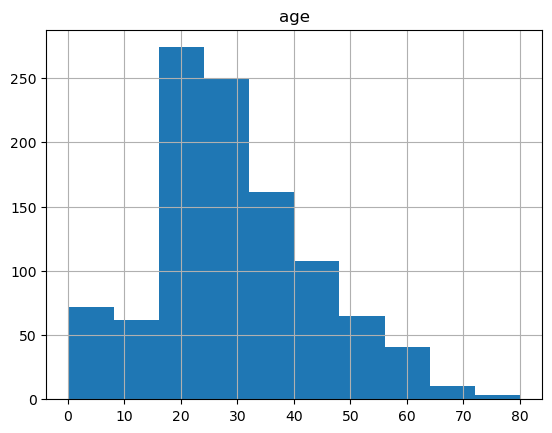

In [84]:
histogram = pd_titanic.hist()

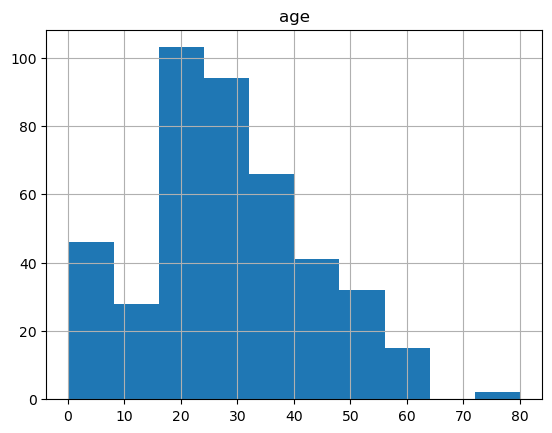

In [86]:
pd_tsurvive = pd_titanic[pd_titanic.survived=='yes']
histogramSurvive = pd_tsurvive.hist()

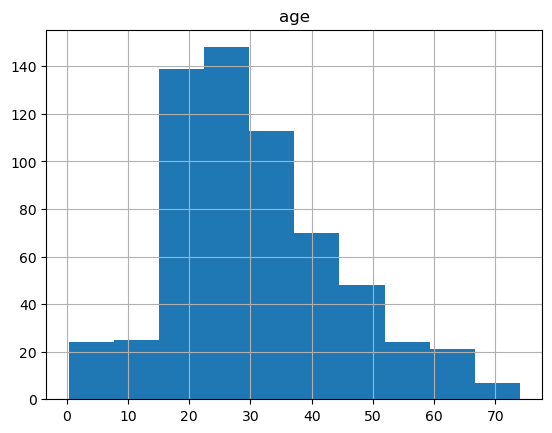

In [88]:
pd_tsurvive = pd_titanic[pd_titanic.survived=='no']
histogramSurvive = pd_tsurvive.hist()